In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pprint

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout, SimpleRNN


%matplotlib inline

Using TensorFlow backend.


In [ ]:
# Uploading local saved csv files to colab
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [ ]:
df = pd.read_csv('train.csv', parse_dates=['timestamp'], index_col='timestamp')

In [ ]:
print("="*50)
print("First Five Rows ","\n")
print(df.head(5),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

                      main_meter  sub_meter_1  sub_meter_2  building_number
timestamp                                                                  
2017-04-01 00:00:00  2898.969633  1390.244624     0.000000                1
2017-04-01 00:15:00  2531.896894  1087.313897     0.000000                1
2017-04-01 00:30:00  2171.649138   695.625737     0.484790                1
2017-04-01 00:45:00  2207.299159   615.496571     1.317875                1
2017-04-01 01:00:00  2839.441067  1071.573744     0.000000                1 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132000 entries, 2017-04-01 00:00:00 to 2017-12-31 23:45:00
Data columns (total 4 columns):
main_meter         132000 non-null float64
sub_meter_1        132000 non-null float64
sub_meter_2        132000 non-null float64
building_number    132000 non-null int64
dtypes: float64(3), int64(1)
memory usage: 5.0 MB
None 

Describe the Dataset  

          main_meter    

In [ ]:
df5 = df[df['building_number'] == 5]
df4 = df[df['building_number'] == 4]
df3 = df[df['building_number'] == 3]
df2 = df[df['building_number'] == 2]
df1 = df[df['building_number'] == 1]

In [ ]:
df5.tail()

,main_meter,sub_meter_1,sub_meter_2,building_number
timestamp,,,,
2017-12-31 22:45:00,2235.824452,1116.541777,0.000000,5
2017-12-31 23:00:00,2372.073420,1239.023765,0.000000,5
2017-12-31 23:15:00,2339.986234,1155.845219,0.000000,5
2017-12-31 23:30:00,2307.052698,1175.130243,0.000000,5
2017-12-31 23:45:00,2322.664247,1187.947272,9.424013,5


In [ ]:
sub_meter_1 = df5['sub_meter_1']
main_meter = df5['main_meter']
sub_meter_1 = df4['sub_meter_1']
main_meter = df4['main_meter']
sub_meter_1 = df3['sub_meter_1']
main_meter = df3['main_meter']
sub_meter_1 = df2['sub_meter_1']
main_meter = df2['main_meter']
sub_meter_1 = df1['sub_meter_1']
main_meter = df1['main_meter']

In [ ]:
df5.drop(['sub_meter_1', 'main_meter', 'building_number'], axis=1, inplace=True)
df4.drop(['sub_meter_1', 'main_meter', 'building_number'], axis=1, inplace=True)
df3.drop(['sub_meter_1', 'main_meter', 'building_number'], axis=1, inplace=True)
df2.drop(['sub_meter_1', 'main_meter', 'building_number'], axis=1, inplace=True)
df1.drop(['sub_meter_1', 'main_meter', 'building_number'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df1.head()

,sub_meter_2
timestamp,
2017-04-01 00:00:00,0.000000
2017-04-01 00:15:00,0.000000
2017-04-01 00:30:00,0.484790
2017-04-01 00:45:00,1.317875
2017-04-01 01:00:00,0.000000


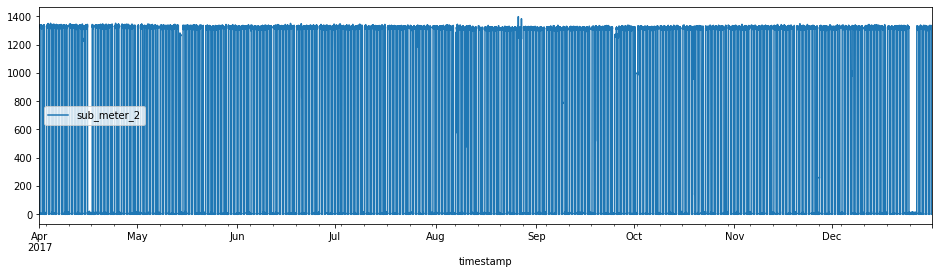

In [ ]:
df5.plot(figsize=(16,4),legend=True)
plt.show()

In [ ]:
import sklearn.preprocessing
from sklearn.metrics import r2_score

In [ ]:
scaler = sklearn.preprocessing.MinMaxScaler()
df5['sub_meter_2']=scaler.fit_transform(df5['sub_meter_2'].values.reshape(-1,1))
df4['sub_meter_2']=scaler.fit_transform(df5['sub_meter_2'].values.reshape(-1,1))
df3['sub_meter_2']=scaler.fit_transform(df5['sub_meter_2'].values.reshape(-1,1))
df2['sub_meter_2']=scaler.fit_transform(df5['sub_meter_2'].values.reshape(-1,1))
df1['sub_meter_2']=scaler.fit_transform(df5['sub_meter_2'].values.reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [ ]:
df1

,sub_meter_2
timestamp,
2017-04-01 00:00:00,0.000000
2017-04-01 00:15:00,0.000000
2017-04-01 00:30:00,0.005507
2017-04-01 00:45:00,0.000000
2017-04-01 01:00:00,0.000000
...,...
2017-12-31 22:45:00,0.000000
2017-12-31 23:00:00,0.000000
2017-12-31 23:15:00,0.000000


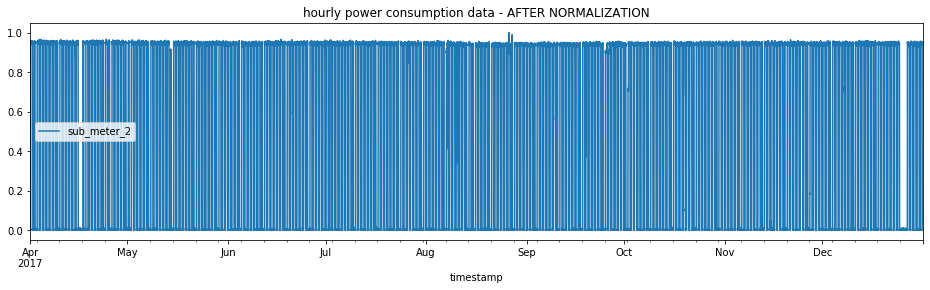

In [ ]:
df1.plot(figsize=(16,4),legend=True)

plt.title('hourly power consumption data - AFTER NORMALIZATION')

plt.show()

In [ ]:
df1.shape

(26400, 1)

In [ ]:
def load_data(stock, seq_len):
    X_train = []
    y_train = []
    for i in range(seq_len, len(stock)):
        X_train.append(stock.iloc[i-seq_len : i, 0])
        y_train.append(stock.iloc[i, 0])
    
    #1 last 30 days are going to be used in test
    #X_test = X_train[23520:]             
    #y_test = y_train[23520:]
    
    #2 first ... days are going to be used in training
    #X_train = X_train[:23520]           
    #y_train = y_train[:23520]
    
    #3 convert to numpy array
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    #X_test = np.array(X_test)
    #y_test = np.array(y_test)
    
    #4 reshape data to input into lstm models
    X_train = np.reshape(X_train, (len(X_train), seq_len, 1))
    
    #X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))
    
    return X_train, y_train

In [ ]:
#create train, test data
seq_len = 20 #choose sequence length also check it for 1 day

X_train, y_train = load_data(df1, seq_len)

print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
#print('X_test.shape = ', X_test.shape)
#print('y_test.shape = ',y_test.shape)

X_train.shape =  (26380, 20, 1)
y_train.shape =  (26380,)


In [ ]:
lstm_model = Sequential()

lstm_model.add(LSTM(70,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
lstm_model.add(Dropout(0.20))

lstm_model.add(LSTM(70,activation="tanh",return_sequences=True))
lstm_model.add(Dropout(0.20))

lstm_model.add(LSTM(70,activation="tanh",return_sequences=False))
lstm_model.add(Dropout(0.20))

lstm_model.add(Dense(1))

lstm_model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20, 70)            20160     
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 70)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 20, 70)            39480     
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 70)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 70)                39480     
_________________________________________________________________
dropout_3 (Dropout)          (None, 70)                0         
_

In [ ]:
lstm_model.compile(optimizer="adam",loss="MSE")
lstm_model.fit(X_train, y_train, epochs=70, batch_size=1024)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/70





26380/26380 [==============================] - 20s 771us/step - loss: 0.1546
Epoch 2/70
26380/26380 [==============================] - 18s 695us/step - loss: 0.0792
Epoch 3/70
26380/26380 [==============================] - 18s 685us/step - loss: 0.0592
Epoch 4/70
26380/26380 [==============================] - 18s 680us/step - loss: 0.0514
Epoch 5/70
26380/26380 [==============================] - 18s 681us/step - loss: 0.0450
Epoch 6/70
26380/26380 [==============================] - 18s 686us/step - loss: 0.0397
Epoch 7/70
26380/26380 [==============================] - 18s 689us/step - loss: 0.0345
Epoch 8/70
26380/26380 [==============================] - 18s 691us/step - loss: 0.0306
Epoch 9/70
26380/26380 [==============================] - 18s 690us/step - loss: 0.0273
Epoch 10/70
26380/26380 [==============================] - 19s 702us/step - loss: 0.0249
Epoch 11/70
2638

In [ ]:
#create train, test data
seq_len = 20 #choose sequence length also check it for 1 day

X_train, y_train = load_data(df2, seq_len)

print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
#print('X_test.shape = ', X_test.shape)
#print('y_test.shape = ',y_test.shape)

X_train.shape =  (26380, 20, 1)
y_train.shape =  (26380,)


In [ ]:
lstm_model2 = Sequential()

lstm_model2.add(LSTM(70,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
lstm_model2.add(Dropout(0.20))

lstm_model2.add(LSTM(70,activation="tanh",return_sequences=True))
lstm_model2.add(Dropout(0.20))

lstm_model2.add(LSTM(70,activation="tanh",return_sequences=False))
lstm_model2.add(Dropout(0.20))

lstm_model2.add(Dense(1))

lstm_model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 20, 70)            20160     
_________________________________________________________________
dropout_4 (Dropout)          (None, 20, 70)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 20, 70)            39480     
_________________________________________________________________
dropout_5 (Dropout)          (None, 20, 70)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 70)                39480     
_________________________________________________________________
dropout_6 (Dropout)          (None, 70)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [ ]:
lstm_model2.compile(optimizer="adam",loss="MSE")
lstm_model2.fit(X_train, y_train, epochs=70, batch_size=1024)

Epoch 1/70
26380/26380 [==============================] - 21s 792us/step - loss: 0.1746
Epoch 2/70
26380/26380 [==============================] - 18s 684us/step - loss: 0.0906
Epoch 3/70
26380/26380 [==============================] - 18s 677us/step - loss: 0.0616
Epoch 4/70
26380/26380 [==============================] - 18s 681us/step - loss: 0.0525
Epoch 5/70
26380/26380 [==============================] - 18s 689us/step - loss: 0.0465
Epoch 6/70
26380/26380 [==============================] - 18s 696us/step - loss: 0.0413
Epoch 7/70
26380/26380 [==============================] - 18s 680us/step - loss: 0.0367
Epoch 8/70
26380/26380 [==============================] - 18s 690us/step - loss: 0.0326
Epoch 9/70
26380/26380 [==============================] - 18s 686us/step - loss: 0.0290
Epoch 10/70
26380/26380 [==============================] - 18s 683us/step - loss: 0.0265
Epoch 11/70
26380/26380 [==============================] - 18s 686us/step - loss: 0.0240
Epoch 12/70
26380/26380 [=====

In [ ]:
lstm_model5.compile(optimizer="adam",loss="MSE")
lstm_model5.fit(X_train, y_train, epochs=70, batch_size=1024)

Epoch 1/70
26380/26380 [==============================] - 23s 854us/step - loss: 0.1727
Epoch 2/70
26380/26380 [==============================] - 18s 689us/step - loss: 0.0804
Epoch 3/70
26380/26380 [==============================] - 18s 685us/step - loss: 0.0609
Epoch 4/70
26380/26380 [==============================] - 19s 704us/step - loss: 0.0533
Epoch 5/70
26380/26380 [==============================] - 18s 689us/step - loss: 0.0473
Epoch 6/70
26380/26380 [==============================] - 18s 691us/step - loss: 0.0424
Epoch 7/70
26380/26380 [==============================] - 18s 699us/step - loss: 0.0373
Epoch 8/70
26380/26380 [==============================] - 18s 690us/step - loss: 0.0329
Epoch 9/70
26380/26380 [==============================] - 18s 686us/step - loss: 0.0290
Epoch 10/70
26380/26380 [==============================] - 18s 689us/step - loss: 0.0258
Epoch 11/70
26380/26380 [==============================] - 18s 694us/step - loss: 0.0233
Epoch 12/70
26380/26380 [=====